https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=12)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5],y[:5]

(array([[ 0.76285419,  0.21290457],
        [-0.01353444, -0.7827793 ],
        [-0.67886261, -0.42597787],
        [-1.00609936, -0.32508754],
        [-0.58527996, -0.79164499]]),
 array([1, 1, 1, 0, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,0.762854,0.212905,1
1,-0.013534,-0.782779,1
2,-0.678863,-0.425978,1
3,-1.006099,-0.325088,0
4,-0.585280,-0.791645,0


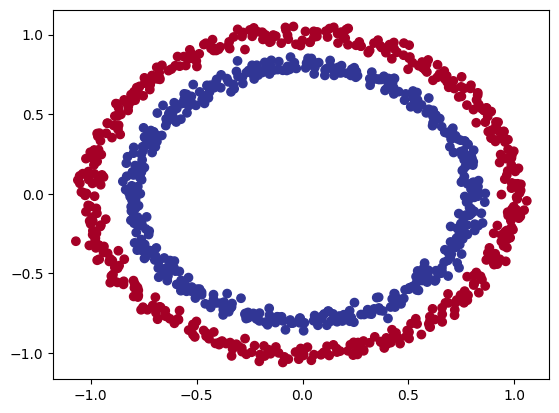

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);


# **Check input and output shapes**

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(X_sample,y_sample)
print(X_sample.shape,y_sample.shape)

[0.76285419 0.21290457] 1
(2,) ()


# **Turn data into tensors and split**

In [ ]:
import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

(tensor([[ 0.7629,  0.2129],
         [-0.0135, -0.7828],
         [-0.6789, -0.4260],
         [-1.0061, -0.3251],
         [-0.5853, -0.7916]]),
 tensor([1., 1., 1., 0., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=12)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,
                             out_features=15)
    self.layer_2 = nn.Linear(in_features=15,
                             out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))   #x -> layer1 -> layer_2 ->o/p

model_0 = CircleModelV1().to(device)
model_0



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
 model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=1)
 ).to(device)

 model_1

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5630,  0.1557],
                      [-0.3732,  0.3296],
                      [-0.6820, -0.0541],
                      [ 0.6615, -0.0093],
                      [-0.3063,  0.0671],
                      [-0.4310,  0.0996],
                      [ 0.1915, -0.3744],
                      [ 0.2039,  0.2313],
                      [ 0.3475, -0.0937],
                      [ 0.3850,  0.6590],
                      [-0.0975,  0.6543],
                      [ 0.1090,  0.6970],
                      [-0.3497, -0.2104],
                      [ 0.0856,  0.4703],
                      [-0.4532, -0.1831]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.0209,  0.3330, -0.1544,  0.1171, -0.6829, -0.6044,  0.7007,  0.6392,
                      -0.0213, -0.5446,  0.4116, -0.4558, -0.1267,  0.2987, -0.2217],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2387, -0.1

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3757, -0.0560],
                      [ 0.3375,  0.3291],
                      [ 0.1284, -0.3707],
                      [-0.5687,  0.1324],
                      [ 0.2421,  0.4667],
                      [-0.5710, -0.3764],
                      [ 0.4046, -0.0354],
                      [ 0.4886, -0.2099],
                      [ 0.3068, -0.1514],
                      [-0.3919, -0.1513],
                      [-0.5589,  0.3202],
                      [-0.3377,  0.0154],
                      [ 0.4170, -0.4664],
                      [ 0.3992, -0.4528],
                      [ 0.5906, -0.6692],
                      [ 0.1370, -0.2934],
                      [-0.3980,  0.2739],
                      [-0.0175, -0.5866],
                      [ 0.1830,  0.4356],
                      [ 0.3993,  0.6142],
                      [-0.2280,  0.6314],
                      [-0.6518,  0.3964],
                      [ 0.5533, -0.5539],
        

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# **Train model**

In [ ]:
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1722],
        [ 0.4982],
        [-0.2249],
        [ 0.5831],
        [ 0.5003]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([0., 0., 0., 1., 0.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5430],
        [0.6220],
        [0.4440],
        [0.6418],
        [0.6225]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
torch.manual_seed(12)
epochs = 500

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  #y_pred = model_0(X_train)

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                    y_pred=test_pred)
    print(f"Epoch: {epoch} | Train Loss: {loss} | Train Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")





Epoch: 0 | Train Loss: 0.6955520510673523 | Train Accuracy: 51.5 | Test Loss: 0.6969063878059387 | Test Accuracy: 53.0
Epoch: 1 | Train Loss: 0.6948257088661194 | Train Accuracy: 53.37499999999999 | Test Loss: 0.6963618397712708 | Test Accuracy: 50.0
Epoch: 2 | Train Loss: 0.6942210793495178 | Train Accuracy: 52.87500000000001 | Test Loss: 0.695903480052948 | Test Accuracy: 51.0
Epoch: 3 | Train Loss: 0.6937206387519836 | Train Accuracy: 52.0 | Test Loss: 0.6955087184906006 | Test Accuracy: 53.0
Epoch: 4 | Train Loss: 0.6932892203330994 | Train Accuracy: 51.37500000000001 | Test Loss: 0.6951615214347839 | Test Accuracy: 53.0
Epoch: 5 | Train Loss: 0.6929063200950623 | Train Accuracy: 51.37500000000001 | Test Loss: 0.6948530673980713 | Test Accuracy: 51.5
Epoch: 6 | Train Loss: 0.6925635933876038 | Train Accuracy: 51.5 | Test Loss: 0.6945694088935852 | Test Accuracy: 50.5
Epoch: 7 | Train Loss: 0.6922498941421509 | Train Accuracy: 52.75 | Test Loss: 0.6943021416664124 | Test Accuracy: 4

In [ ]:
device


'cuda'

# **GIT code**

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5630,  0.1557],
                      [-0.3732,  0.3296],
                      [-0.6820, -0.0541],
                      [ 0.6615, -0.0093],
                      [-0.3063,  0.0671],
                      [-0.4310,  0.0996],
                      [ 0.1915, -0.3744],
                      [ 0.2039,  0.2313],
                      [ 0.3475, -0.0937],
                      [ 0.3850,  0.6590],
                      [-0.0975,  0.6543],
                      [ 0.1090,  0.6970],
                      [-0.3497, -0.2104],
                      [ 0.0856,  0.4703],
                      [-0.4532, -0.1831]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.0209,  0.3330, -0.1544,  0.1171, -0.6829, -0.6044,  0.7007,  0.6392,
                      -0.0213, -0.5446,  0.4116, -0.4558, -0.1267,  0.2987, -0.2217],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2387, -0.1

# **OOP Model Creation**

In [ ]:
from torch import nn
class Model_V(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()


  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = Model_V().to(device)
print(model_2)

Model_V(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
model_2.parameters

<bound method Module.parameters of Model_V(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)>

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

In [ ]:
import numpy as np

In [ ]:
torch.manual_seed(12)
epochs = 1000

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  #y_pred = model_0(X_train)

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                    y_pred=test_pred)
    print(f"Epoch: {epoch} | Train Loss: {loss} | Train Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

    print(type(loss))
    loss1 = loss.to("cpu")
    test_loss1 = test_loss.to("cpu")
    print(type(test_loss1.detach().numpy()))
    #epoch1= epoch.to("cpu")
    train_loss_values.append(loss1.detach())
    test_loss_values.append(test_loss1.detach().numpy())
    epoch_count.append(np.float32(epoch))

    print(type(test_loss_values[0]))


Epoch: 0 | Train Loss: 0.4065709710121155 | Train Accuracy: 95.5 | Test Loss: 0.4218076467514038 | Test Accuracy: 96.5
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch: 1 | Train Loss: 0.4054504632949829 | Train Accuracy: 95.5 | Test Loss: 0.42069220542907715 | Test Accuracy: 96.5
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch: 2 | Train Loss: 0.40432602167129517 | Train Accuracy: 95.75 | Test Loss: 0.41958415508270264 | Test Accuracy: 96.5
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch: 3 | Train Loss: 0.40320196747779846 | Train Accuracy: 95.75 | Test Loss: 0.418474406003952 | Test Accuracy: 96.5
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch: 4 | Train Loss: 0.40207526087760925 | Train Accuracy: 95.875 | Test Loss: 0.41735559701919556 | Test Accuracy: 96.5
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch: 5 | Train Loss: 0.4009451568126678

In [ ]:
epoch_count

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
import matplotlib.pyplot as plt
(epoch_count[0])

0

In [ ]:
test_loss_values[5]

array(0.41622913, dtype=float32)

In [ ]:
plt.plot((epoch_count, float(test_loss_values)) )

TypeError: ignored

In [ ]:
type(epoch_count[2] )

int

In [ ]:
type(train_loss_values[2] )

torch.Tensor

In [ ]:
train_loss_values[:10]

[tensor(0.7012),
 tensor(0.7004),
 tensor(0.6996),
 tensor(0.6989),
 tensor(0.6983),
 tensor(0.6976),
 tensor(0.6971),
 tensor(0.6966),
 tensor(0.6961),
 tensor(0.6956)]